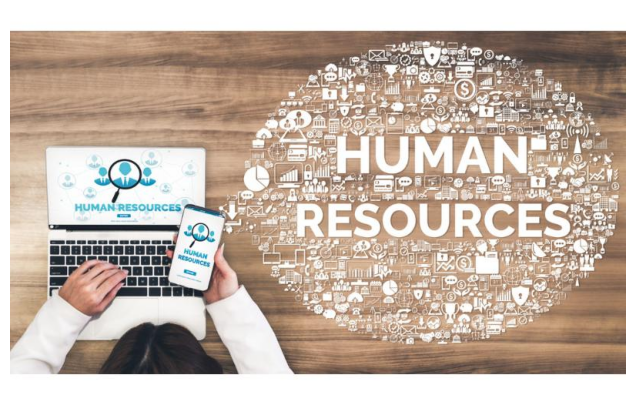

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/ASUS/Documents/3. Development Stuff/Data Analis Project/Python Scripts/Dataset/HR Wallpaper.jpg')
plt.figure(figsize=(16,5))
plt.imshow(img, extent=[0, img.shape[1], img.shape[0], 0])
plt.axis('off')
plt.show()

image:freepik.com

## HR Analyst Employee Resign using Logistic Regression

by : Elza fr

In the realm of human resources, a unique tale is unfolding - the resignation of an HR analyst, dissected through the lens of logistic regression. This isn't just a departure; it's a data-driven narrative. Join us as we unravel the factors and probabilities that guided this decision, merging the precision of analytics with the complexities of human emotions. 

This is the story of how numbers and sentiments collide in the corporate world.

In [1]:
# Import Package Needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

Dataset Description

Source : Kaggle.com

- satisfaction_level: Employee-reported job satisfaction level [0&ndash;1]|
- last_evaluation : Score of employee's last performance review [0&ndash;1]|
- number_project : Number of projects employee contributes to
- average_monthly_hours : Average number of hours employee worked per month
- time_spend_company : How long the employee has been with the company (years)
- Work_accident : Whether or not the employee experienced an accident while at work
- left : Whether or not the employee left the company
- promotion_last_5years : Whether or not the employee was promoted in the last 5 years
- Department : The employee's department
- salary : The employee's salary (U.S. dollars)

In [2]:
# # Import Dataset and Display Example of Data
df = pd.read_csv('Dataset/salifort_motor_hr_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Preparation

data Preparation is a crucial preparatory step in the data analysis process. It involves tasks like :
- data describe and info
- handling missing data
- rename specific column
- and more

These adjustments ensure that the data is in a suitable format for analysis, improving the quality and accuracy of the results.

In [3]:
# Info of General dataset to view null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Seeking for null value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
# Describing Statistical Descriptive Data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Columns looks
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [32]:
# Looks for sum Duplicated values and duplicate example
print('sum duplicated : ',df.duplicated().sum(),'\n')
df[df.duplicated()].head()

sum duplicated :  0 



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


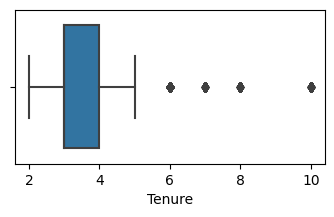

In [11]:
# Outlier View using Boxplot
plt.figure(figsize=(4,2))
sns.boxplot(data = df, x = 'time_spend_company')
plt.xlabel('Tenure')
plt.show()

In [12]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print((df['left'].value_counts() / len(df) * 100).map('{:.2f}%'.format).astype(str) + "%")

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.40%%
1    16.60%%
Name: count, dtype: object


In [ ]:
# Lowercase every columns
df.columns = [col.lower() for col in df.columns]

In [ ]:
# Drop duplicated value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

# Data Visualization

In essence, data visualization is a versatile tool that enhances data understanding, supports decision-making, and facilitates effective communication of insights across a wide range of applications

Data Visualization is very important step to gathering more insight of the Data. The following Visual plot below have function like :
- presenting univariate data distribution
- visualizing categorical data
- see distribution of numerical data across different categories
- comparation function

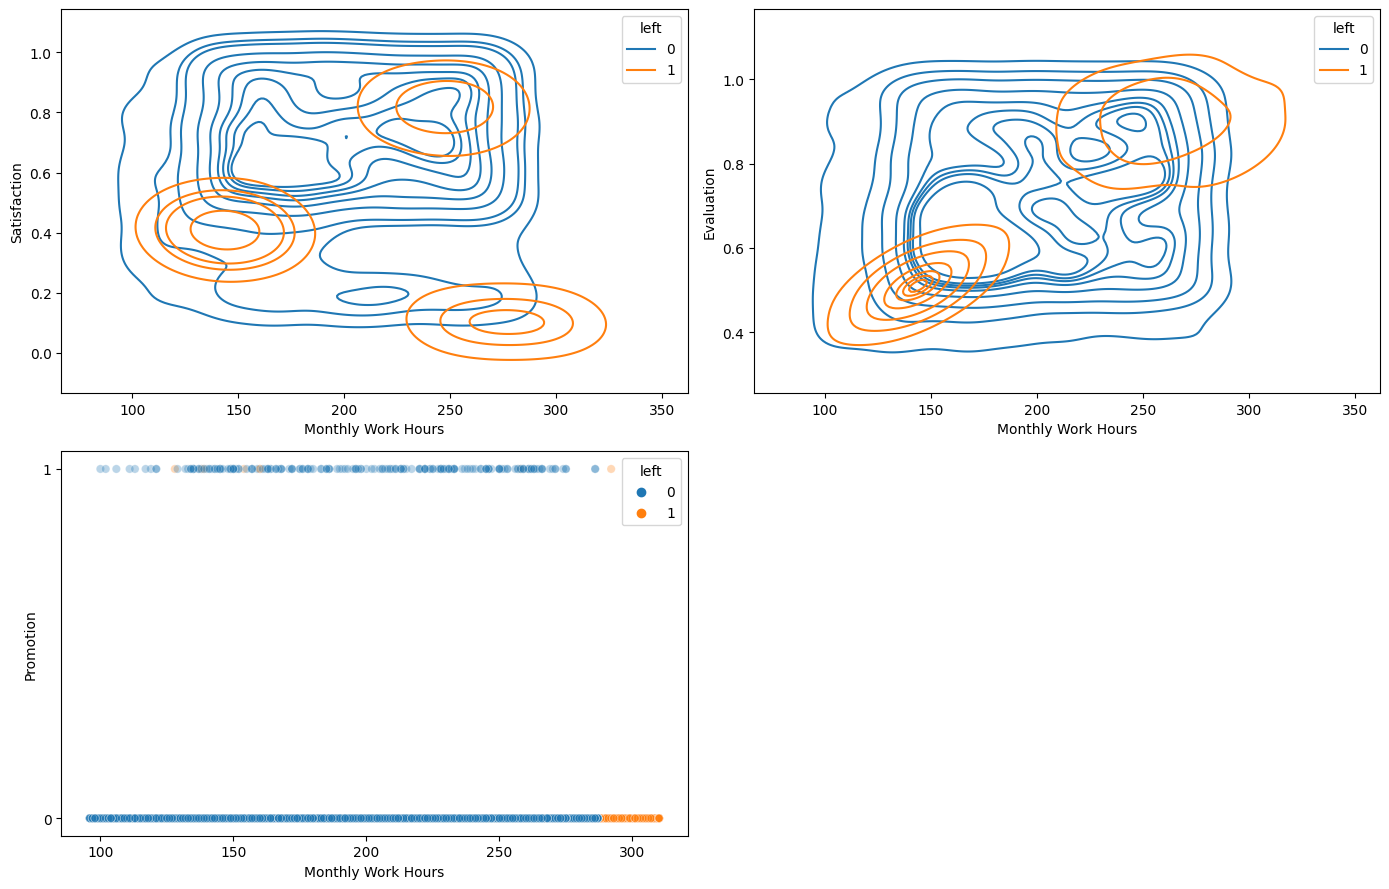

In [13]:
# Using Kde and Scatter for descripting float value
fig, axes = plt.subplots(2,2,figsize=(14,9))

# kdeplot 1
sns.kdeplot(data=df, x='average_montly_hours', y='satisfaction_level', hue='left', ax=axes[0,0])
axes[0,0].set_xlabel('Monthly Work Hours')
axes[0,0].set_ylabel('Satisfaction')

# kdeplot 2
sns.kdeplot(data=df, x='average_montly_hours', y='last_evaluation', hue='left',ax=axes[0,1])
axes[0,1].set_xlabel('Monthly Work Hours')
axes[0,1].set_ylabel('Evaluation')

# scatterplot 1
sns.scatterplot(data=df, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.3, ax=axes[1,0])
axes[1,0].set_xlabel('Monthly Work Hours')
axes[1,0].set_ylabel('Promotion')
axes[1,0].set_yticks([0,1])

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

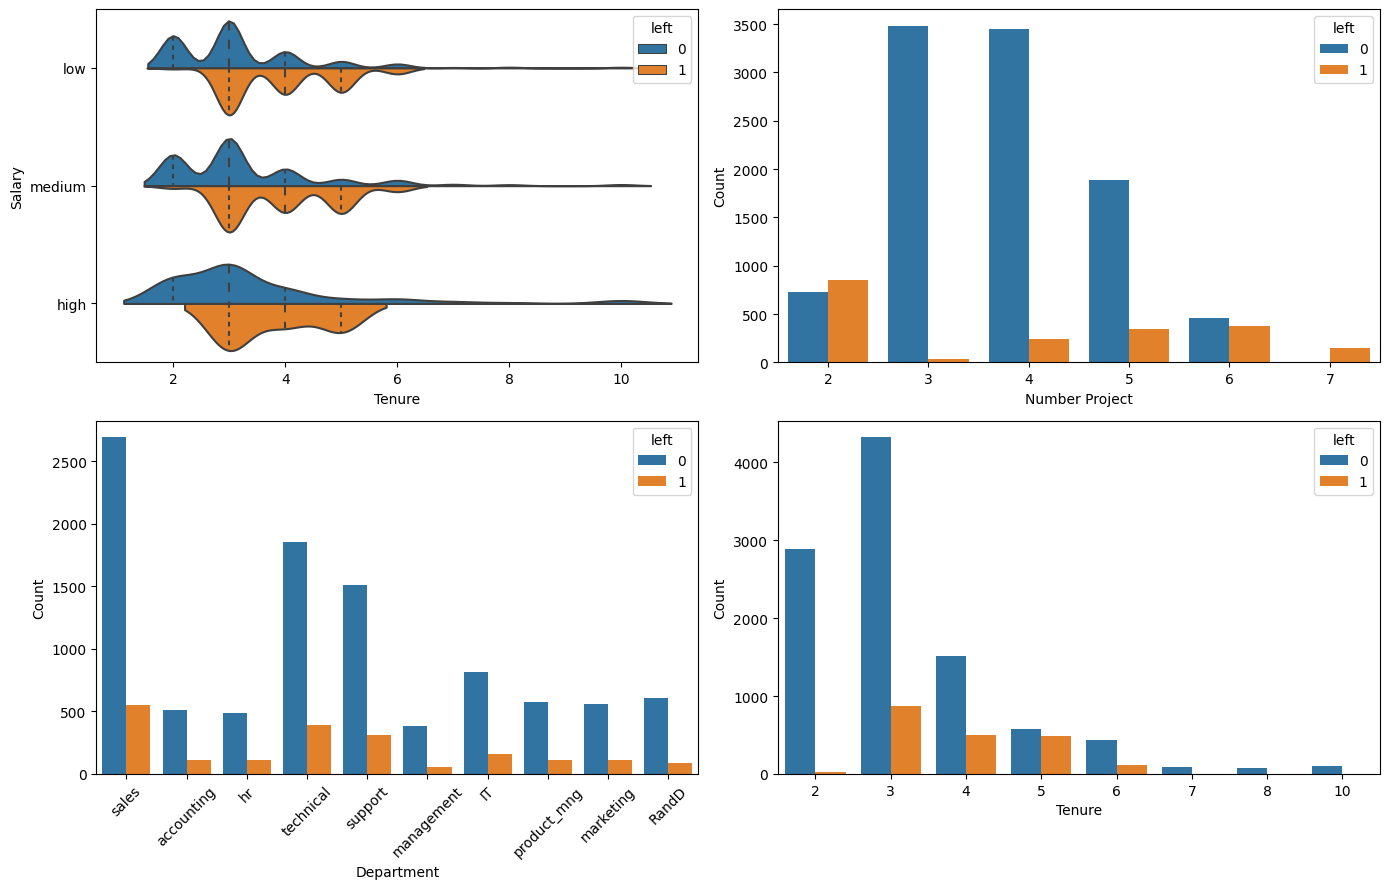

In [14]:
# Categoric Visual Description using violin and barplot
fig, axes = plt.subplots(2,2,figsize=(14,9))

sns.violinplot(data=df, y='salary', x='time_spend_company', hue='left', split=True, inner="quart", ax=axes[0,0])
axes[0,0].set_xlabel('Tenure')
axes[0,0].set_ylabel('Salary')

sns.countplot(data=df,x='number_project',hue='left', ax=axes[0,1])
axes[0,1].set_xlabel('Number Project')
axes[0,1].set_ylabel('Count')

sns.countplot(data=df,x='department',hue='left', ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1,0].set_xlabel('Department')
axes[1,0].set_ylabel('Count')

sns.countplot(data=df,x='time_spend_company',hue='left',ax=axes[1,1])
axes[1,1].set_xlabel('Tenure')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Evaluation')

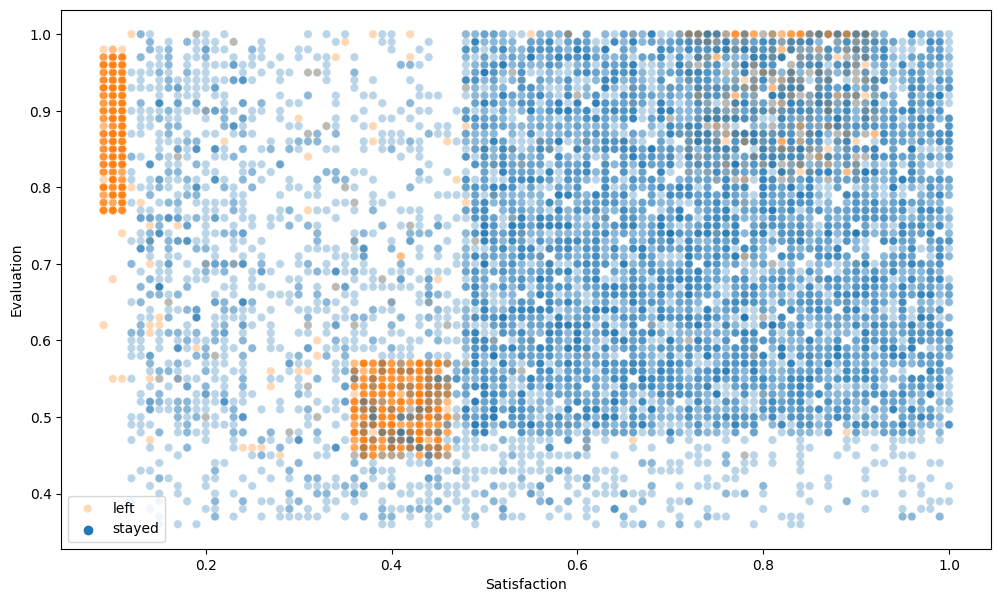

In [15]:
# Scatterplot for correlation and evaluation to left variable
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.3)
plt.legend(labels=['left', 'stayed'])
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')

The scatterplot above shows that there was a sizeable group of employees who got evaluation score high or low. It's likely this is related to their satisfaction levels being close to zero. 

Plot Explain :

- KDE Plot : A KDE plot shows the distribution of data with a smooth curve.
It highlights where data is most common and where it's less so.

- Scatter Plot : A scatter plot displays data points on a graph.
It helps visualize relationships or patterns between two variables.

- Violin Plot : 
A violin plot displays data distribution and density using mirrored shapes resembling violins.
It's useful for comparing data distributions between categori

- Barplot : A barplot uses bars to show and compare values or quantities of different categories.
It's a simple way to visualize data differences between groups.

# Data Preprocessing

Data preprocessing is a critical step in the data analysis and machine learning pipeline. It involves a series of actions and transformations applied to raw data to prepare it for analysis or modeling.

- in this procedure we gonna perform encoding to make categorical data into numeric format so it can fit with machine learning. So many machine learning and statistical algorithms are designed to work with numerical data. the column in HR Data like salary, and department is categorical object Data.

- Determining independet and Dependent variabel gonna shapes the research process, guides the selection of appropriate methods, and allows for the testing of hypotheses and the interpretation of results. for this, we determine the encoded column such a average monthly hours, evalution score, satisfaction etc as a independent Data as a main factor which affected the dependent Data (Leftment).

-  then we gonna split the Dataset into Test and Train. It allows us to assess a model's performance on unseen data, ensuring that it generalizes effectively. Proper random splitting and considerations for class balance and reproducibility are essential for robust model evaluation and development.

In [16]:
# make a second dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category')
                    .cat.set_categories(['low', 'medium', 'high'])
                    .cat.codes)

# Transform department column into separate encoding column
dummies = pd.get_dummies(df_enc['department'], drop_first=False).astype(int).add_prefix('department_')

# Join the encode df and departement separate column
df_enc = df_enc.join(dummies).drop('department', axis=1)

In [17]:
# Determine the number of rows containing outliers
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = Q3 - Q1

# Define the upper limit and lower limit for non-outlier values in `tenure`
Uwishker = Q3 + 1.5 * iqr
Lwishker = Q1 - 1.5 * iqr

# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_enc = df_enc[(df_enc['time_spend_company'] > Lwishker) & (df_enc['time_spend_company'] < Uwishker)]

In [18]:
# Set features and target variabel
x = df_enc.drop(['left'],axis=1)
y = df_enc['left']

In [19]:
# Set Train and Test split for Independent and Dependent Variabel
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [20]:
# Adjusting best params for Logistic Regression modelling
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [21]:
# Deploying best params into model parameter
best_params = grid_search.best_params_

model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])

In [22]:
# Construct the logistic regression model to get predictions on the test set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
# Create classification report and accuarcy score for logistic regression model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2786
           1       0.00      0.00      0.00       565

    accuracy                           0.83      3351
   macro avg       0.42      0.50      0.45      3351
weighted avg       0.69      0.83      0.75      3351

Accuracy: 0.8313936138466129


-------------------------------------------------------------------------------------------------------------------------------------------------------

Summary : 

In summary, our application of logistic regression analysis has uncovered key determinants of employee resignations in the HR department. As we move forward, continuous refinement and adaptation of our models will be essential in maintaining our competitive edge in HR analytics.

__Thanks for Attention, hope this analysis get u some great insight__